## Función: Redimensionar Imagen para Redes Sociales

In [ ]:
from PIL import Image # Importamos la librería Pillow para trabajar con imágenes
import requests # Importamos requests para descargar imágenes de internet
from io import BytesIO

def redimensionar_imagen_red_social(ruta_imagen, plataforma):
    # Esta función redimensiona una imagen para diferentes redes sociales

    # Primero, definimos las dimensiones recomendadas para cada plataforma.
    dimensiones = {
        "Youtube": (1280, 720),    # Tamaño para miniaturas de YouTube
        "Instagram": (1080, 1080), # Tamaño cuadrado para posts de Instagram
        "Twitter": (1600, 900),    # Tamaño para imágenes en tweets (cabecera)
        "Facebook": (1200, 630)    # Tamaño para imágenes de portada de Facebook
    }

    # Obtenemos el ancho y alto deseado para la plataforma elegida.
    ancho_destino, alto_destino = dimensiones[plataforma]

    # Intentamos cargar la imagen. Puede ser una URL o una ruta de archivo local.
    if ruta_imagen.startswith(('http://', 'https://')): # Si la ruta empieza con 'http' o 'https', es una URL
        # Descargamos la imagen desde la URL
        response = requests.get(ruta_imagen)
        # Abrimos la imagen descargada en memoria
        img = Image.open(BytesIO(response.content))
    else: # Si no es una URL, asumimos que es una ruta de archivo local
        # Abrimos la imagen desde el archivo local
        img = Image.open(ruta_imagen)

    # Obtenemos las dimensiones originales de la imagen que acabamos de abrir.
    original_ancho, original_alto = img.size

    # *** Cálculo para mantener la proporción de la imagen y evitar que se distorsione ***
    # Calculamos cuánto necesitamos escalar el ancho para que quepa en el ancho_destino
    ratio_ancho = ancho_destino / original_ancho
    # Calculamos cuánto necesitamos escalar el alto para que quepa en el alto_destino
    ratio_alto = alto_destino / original_alto

    ratio = min(ratio_ancho, ratio_alto)

    # Calculamos las nuevas dimensiones de la imagen aplicando este ratio.
    nuevo_ancho = int(original_ancho * ratio)
    nuevo_alto = int(original_alto * ratio)

    # Redimensionamos la imagen
    img_redimensionada = img.resize((nuevo_ancho, nuevo_alto), Image.LANCZOS)

    # Creamos una nueva imagen (lienzo) con las dimensiones finales de la plataforma.
    imagen_final = Image.new('RGB', (ancho_destino, alto_destino), (255, 255, 255))

    # Calculamos dónde pegar la imagen redimensionada para que quede centrada.
    posicion_x = (ancho_destino - nuevo_ancho) // 2
    posicion_y = (alto_destino - nuevo_alto) // 2

    # Pegamos la imagen redimensionada en el centro del lienzo final.
    imagen_final.paste(img_redimensionada, (posicion_x, posicion_y))

    # Devolvemos la imagen final redimensionada y centrada.
    return imagen_final

### Ejemplo de Uso: Redimensionar Imagen para Redes Sociales

En este ejemplo, definimos una URL de imagen y la pasamos a la función `redimensionar_imagen_red_social` junto con la plataforma deseada.

Imagen redimensionada para Instagram y guardada como 'imagen_redimensionada_Instagram.jpg'


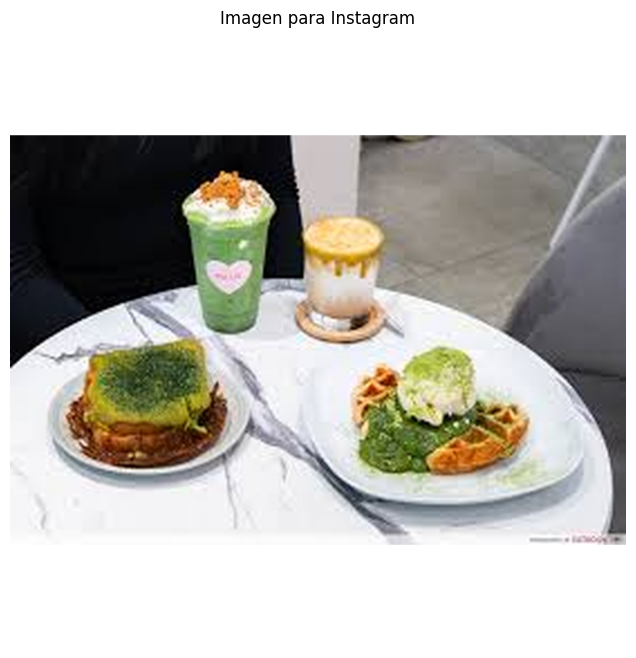

In [ ]:
# URL de una imagen de ejemplo
url_ejemplo = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRCDOsQ2FnVaV0Oakvp7vLEnGrEOQw5IuJDtg&s"

# Plataforma a la que quieres redimensionar la imagen (por ejemplo, Instagram)
plataforma_destino = "Instagram"

# Llamamos a la función para redimensionar la imagen
imagen_redimensionada = redimensionar_imagen_red_social(url_ejemplo, plataforma_destino)

# Si la redimensión fue exitosa, podemos guardar o mostrar la imagen
if imagen_redimensionada:
    nombre_archivo_salida = f"imagen_redimensionada_{plataforma_destino}.jpg"
    imagen_redimensionada.save(nombre_archivo_salida)
    print(f"Imagen redimensionada para {plataforma_destino} y guardada como '{nombre_archivo_salida}'")

    # También podemos mostrarla para verificar
    import matplotlib.pyplot as plt
    plt.figure(figsize=(8, 8))
    plt.imshow(imagen_redimensionada)
    plt.title(f"Imagen para {plataforma_destino}")
    plt.axis('off')
    plt.show()
else:
    print("No se pudo redimensionar la imagen.")



## Función: Ajustar Contraste de Imagen


--- Procesando imagen oscura ---


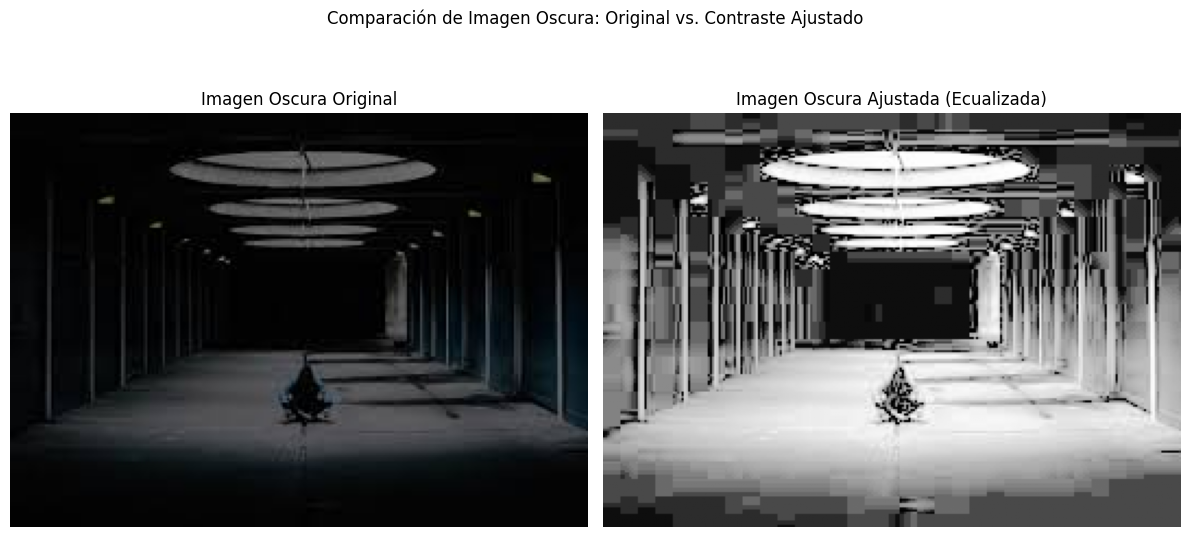

Figura de imagen oscura guardada como 'imagen_oscura_contraste.png'

--- Procesando imagen clara ---


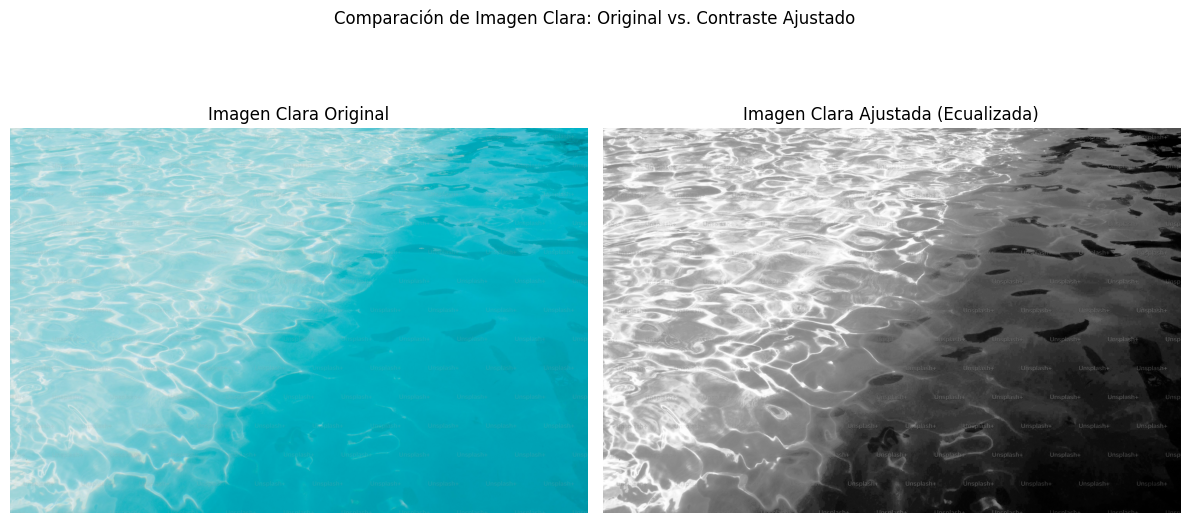

Figura de imagen clara guardada como 'imagen_clara_contraste.png'


In [ ]:
from PIL import Image, ImageOps # Importamos Pillow
import requests # Para descargar imágenes de URLs
from io import BytesIO
import matplotlib.pyplot as plt # Para mostrar y guardar gráficos e imágenes

def ajustar_contraste_histograma(img_pil):
    # Esta función mejora el contraste de una imagen usando ecualización de histograma.
    # Es útil para imágenes muy oscuras o muy claras.

    # La ecualización de histograma funciona mejor en imágenes en blanco y negro (escala de grises).
    if img_pil.mode != 'L':
        # Si no está en escala de grises, la convertimos.
        img_gray = img_pil.convert('L')
    else:
        # Si ya está en escala de grises, la usamos directamente.
        img_gray = img_pil

    # Aplicamos la ecualización del histograma: ImageOps.equalize
    img_equalized = ImageOps.equalize(img_gray)

    # Devolvemos la imagen con el contraste ajustado.
    return img_equalized

def load_image_from_url(url):
    # Esta función descarga una imagen desde una URL y la abre como un objeto de imagen PIL.

    # Intentamos descargar la imagen de la URL.
    response = requests.get(url)
    # Abrimos la imagen desde el contenido descargado.
    img = Image.open(BytesIO(response.content))
    return img


# --- Ejemplos de uso de la función de ajuste de contraste ---

# Definimos las URLs de dos imágenes de ejemplo: una oscura y una clara.
url_oscura = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcToKAuL0mvEO8g_TMWUxaOUwN87kkR7GcFWnQ&s"
url_clara = "https://plus.unsplash.com/premium_photo-1666820202651-314501c88358?fm=jpg&q=60&w=3000&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8YWd1YSUyMGNsYXJhfGVufDB8fDB8fHww"

# *** Procesamiento para la IMAGEN OSCURA ***
print("\n--- Procesando imagen oscura ---")
# 1. Cargamos la imagen oscura desde su URL.
img_oscura_original = load_image_from_url(url_oscura)
# 2. Ajustamos el contraste de la imagen oscura.
img_oscura_ajustada = ajustar_contraste_histograma(img_oscura_original)
# 3. Creamos una figura para mostrar las dos imágenes (original y ajustada).
plt.figure(figsize=(12, 6)) # Definimos el tamaño de la figura (ancho x alto)
# Mostramos la imagen original en el primer "sub-gráfico" de la figura.
plt.subplot(1, 2, 1) # La figura tendrá 1 fila, 2 columnas, y esta es la posición 1.
plt.imshow(img_oscura_original) # Mostramos la imagen original.
plt.title('Imagen Oscura Original') # Le ponemos un título.
plt.axis('off')
# Mostramos la imagen ajustada en el segundo "sub-gráfico" de la figura.
plt.subplot(1, 2, 2) # Esta es la posición 2.
plt.imshow(img_oscura_ajustada, cmap='gray') # Mostramos la imagen ajustada. Usamos 'gray' porque es en escala de grises.
plt.title('Imagen Oscura Ajustada (Ecualizada)') # Le ponemos un título.
plt.axis('off') # Ocultamos los ejes.
# Añadimos un título general para toda la figura.
plt.suptitle('Comparación de Imagen Oscura: Original vs. Contraste Ajustado')
# Ajustamos el diseño para que todo se vea bien y no se superponga.
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# Guardamos la figura como un archivo PNG.
plt.savefig('imagen_oscura_contraste.png')
# Mostramos la figura en pantalla.
plt.show()
print("Figura de imagen oscura guardada como 'imagen_oscura_contraste.png'")

# *** Procesamiento para la IMAGEN CLARA ***
print("\n--- Procesando imagen clara ---")
# 1. Cargamos la imagen clara desde su URL.
img_clara_original = load_image_from_url(url_clara)
# 2. Ajustamos el contraste de la imagen clara.
img_clara_ajustada = ajustar_contraste_histograma(img_clara_original)
# 3. Creamos una figura para mostrar las dos imágenes (original y ajustada).
plt.figure(figsize=(12, 6)) # Definimos el tamaño de la figura.
plt.subplot(1, 2, 1)
plt.imshow(img_clara_original)
plt.title('Imagen Clara Original')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(img_clara_ajustada, cmap='gray')
plt.title('Imagen Clara Ajustada (Ecualizada)')
plt.axis('off')
# Añadimos un título general.
plt.suptitle('Comparación de Imagen Clara: Original vs. Contraste Ajustado')
# Ajustamos el diseño.
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# Guardamos la figura.
plt.savefig('imagen_clara_contraste.png')
# Mostramos la figura en pantalla.
plt.show()
print("Figura de imagen clara guardada como 'imagen_clara_contraste.png'")


## ** 9 filtros de Pillow **

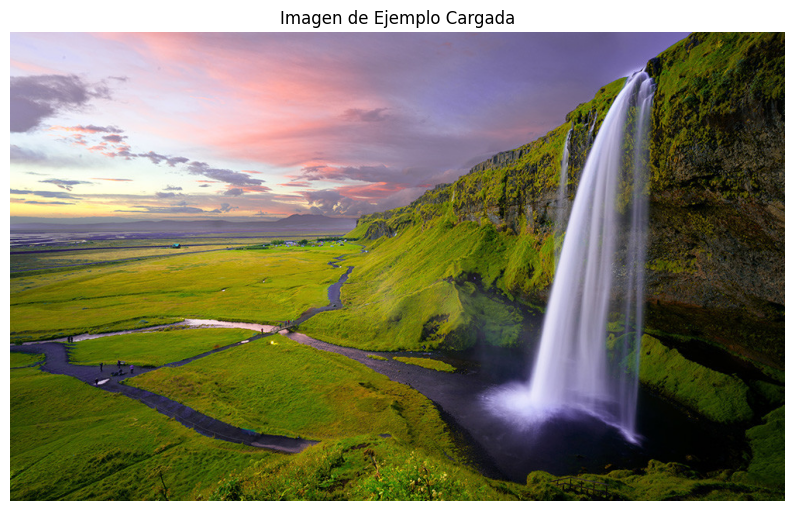

Imagen de ejemplo cargada exitosamente desde: https://i.blogs.es/a79716/filtros-naturaleza-nueva/1366_2000.jpg


In [ ]:
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image


def load_image_from_url(url):
    # Esta función descarga una imagen desde una URL y la abre como un objeto de imagen PIL.

    # Intentamos descargar la imagen de la URL.
    response = requests.get(url)
    # Abrimos la imagen desde el contenido descargado.
    img = Image.open(BytesIO(response.content))
    return img

# 1. Definir una URL de imagen de ejemplo

image_url = "https://i.blogs.es/a79716/filtros-naturaleza-nueva/1366_2000.jpg"

# 2. Cargar la imagen utilizando la función load_image_from_url

img_ejemplo = load_image_from_url(image_url)

# 3. Mostrar la imagen cargada para verificar
plt.figure(figsize=(10, 7))
plt.imshow(img_ejemplo)
plt.title('Imagen de Ejemplo Cargada')
plt.axis('off')
plt.show()

print(f"Imagen de ejemplo cargada exitosamente desde: {image_url}")

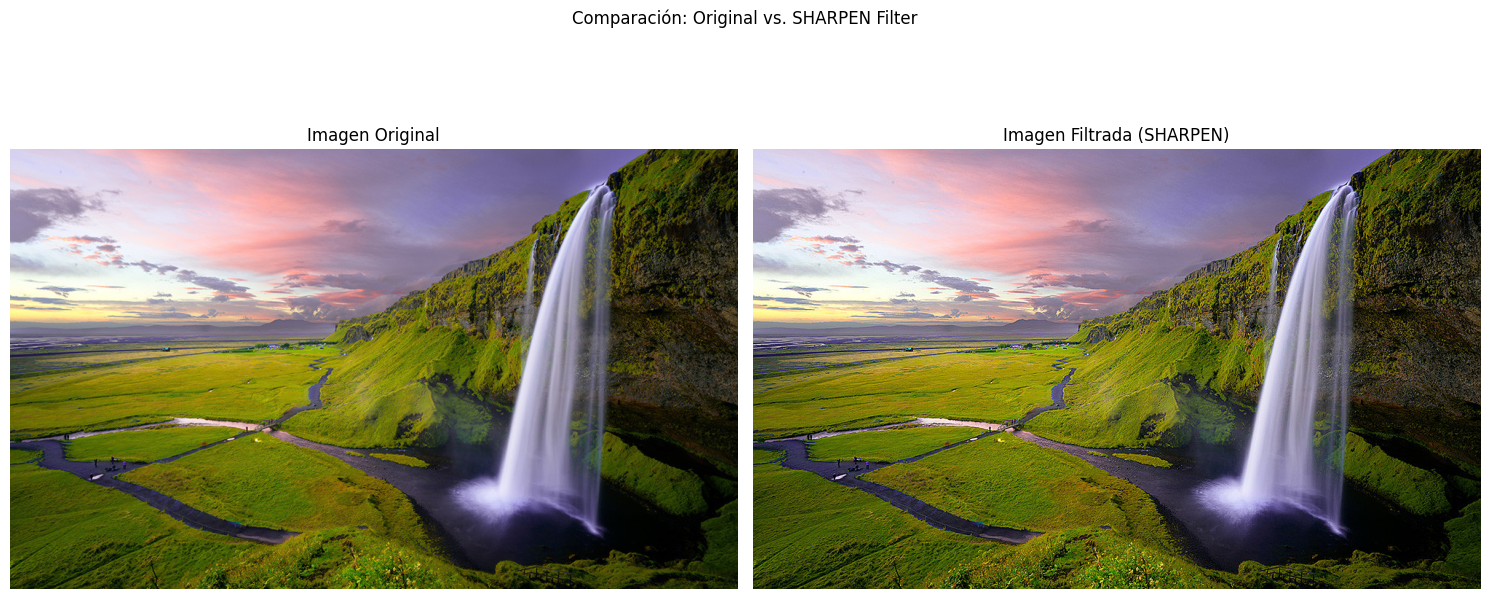

Filtro 'SHARPEN' aplicado exitosamente.


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import requests
from io import BytesIO

# --- Definiciones de funciones necesarias para esta celda ---

def load_image_from_url(url):
    # Esta función descarga una imagen desde una URL y la abre como un objeto de imagen PIL.
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

def aplicar_filtro_pillow(img_pil, nombre_filtro):
    # Diccionario que mapea los nombres de los filtros a sus constantes de ImageFilter.
    filtros_disponibles = {
        'BLUR': ImageFilter.BLUR,
        'CONTOUR': ImageFilter.CONTOUR,
        'DETAIL': ImageFilter.DETAIL,
        'EDGE ENHANCE': ImageFilter.EDGE_ENHANCE,
        'EDGE ENHANCE MORE': ImageFilter.EDGE_ENHANCE_MORE,
        'EMBOSS': ImageFilter.EMBOSS,
        'FIND EDGES': ImageFilter.FIND_EDGES,
        'SHARPEN': ImageFilter.SHARPEN,
        'SMOOTH': ImageFilter.SMOOTH
    }

    # Aplicamos el filtro directamente.
    filtro = filtros_disponibles[nombre_filtro]
    imagen_filtrada = img_pil.filter(filtro)
    return imagen_filtrada

# --- Carga de la imagen de ejemplo para esta celda ---
image_url = "https://i.blogs.es/a79716/filtros-naturaleza-nueva/1366_2000.jpg"
img_ejemplo = load_image_from_url(image_url)


# 1. Elegir un filtro para aplicar
filtro_a_aplicar = "SHARPEN"

# 2. Aplicar el filtro a la imagen de ejemplo
img_filtrada = aplicar_filtro_pillow(img_ejemplo, filtro_a_aplicar)

# 3. Mostrar la imagen original y la imagen filtrada para comparar
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(img_ejemplo)
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_filtrada)
plt.title(f'Imagen Filtrada ({filtro_a_aplicar})')
plt.axis('off')

plt.suptitle(f'Comparación: Original vs. {filtro_a_aplicar} Filter')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print(f"Filtro '{filtro_a_aplicar}' aplicado exitosamente.")


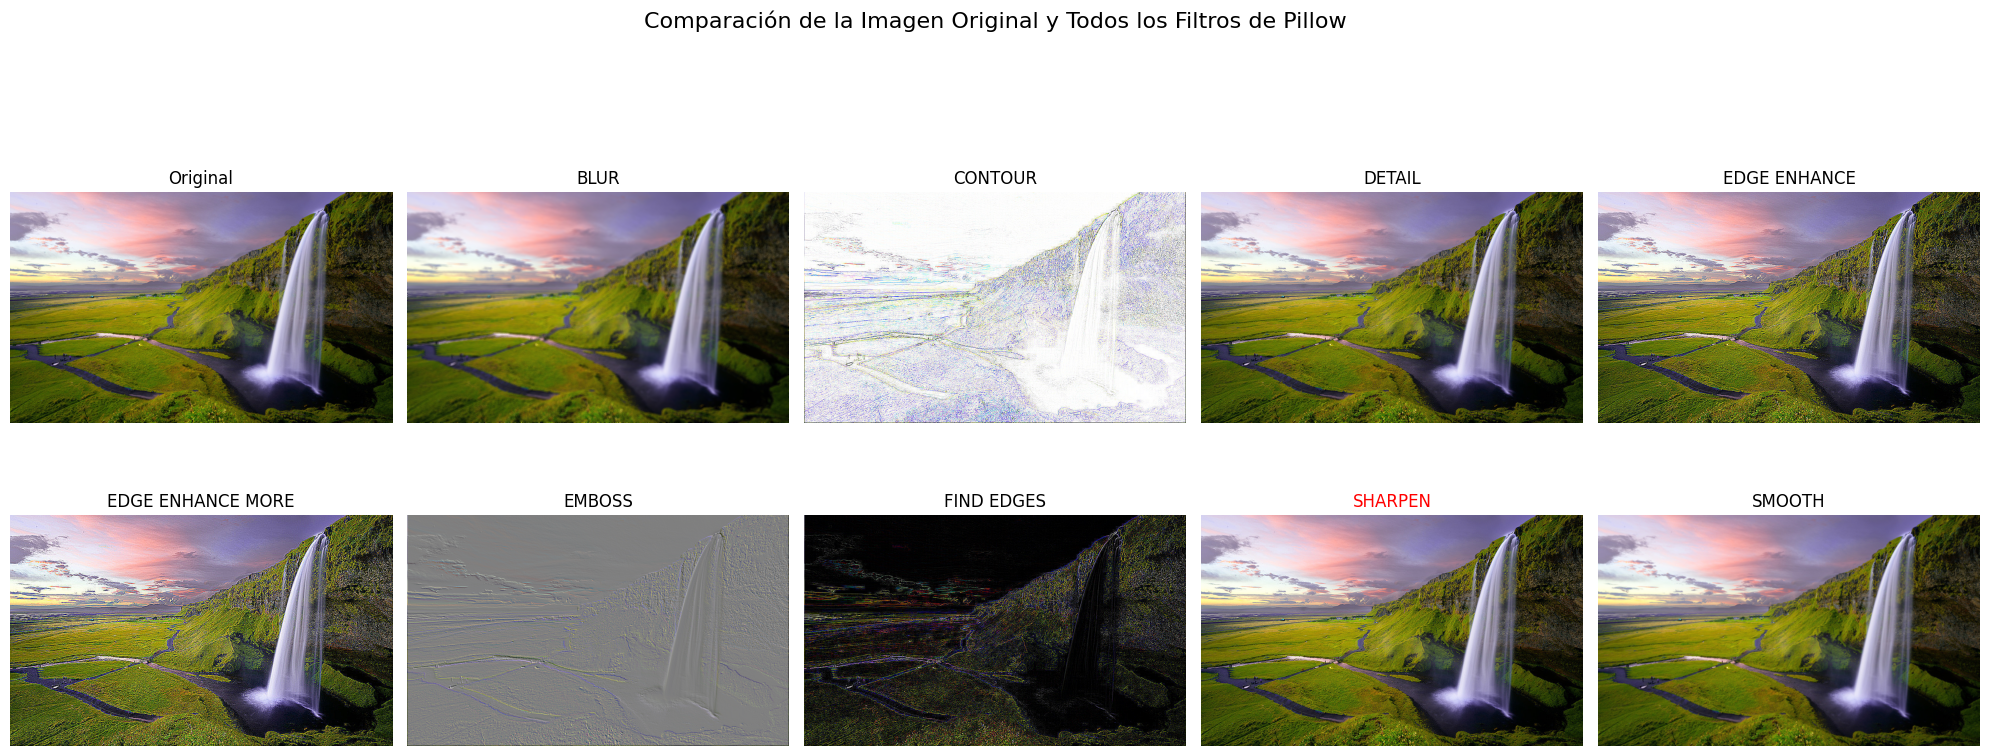

Figura combinada guardada como 'todos_los_filtros_comparacion.png'
Visualización de la imagen original y todos los filtros completada.


<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image, ImageFilter

# --- Definiciones de funciones necesarias para esta celda ---

def load_image_from_url(url):
    # Esta función descarga una imagen desde una URL y la abre como un objeto de imagen PIL.
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

def aplicar_filtro_pillow(img_pil, nombre_filtro):


    filtros_disponibles = {
        'BLUR': ImageFilter.BLUR,
        'CONTOUR': ImageFilter.CONTOUR,
        'DETAIL': ImageFilter.DETAIL,
        'EDGE ENHANCE': ImageFilter.EDGE_ENHANCE,
        'EDGE ENHANCE MORE': ImageFilter.EDGE_ENHANCE_MORE,
        'EMBOSS': ImageFilter.EMBOSS,
        'FIND EDGES': ImageFilter.FIND_EDGES,
        'SHARPEN': ImageFilter.SHARPEN,
        'SMOOTH': ImageFilter.SMOOTH
    }

    # Aplicamos el filtro directamente.
    filtro = filtros_disponibles[nombre_filtro]
    imagen_filtrada = img_pil.filter(filtro)
    return imagen_filtrada

# --- Carga de la imagen de ejemplo para esta celda ---
image_url = "https://i.blogs.es/a79716/filtros-naturaleza-nueva/1366_2000.jpg"
img_ejemplo = load_image_from_url(image_url)

# --- Aplicar y Visualizar Todos los Filtros ---

# 1. Definir una lista de todos los nombres de los filtros
filtros_a_visualizar = [
    "BLUR", "CONTOUR", "DETAIL", "EDGE ENHANCE", "EDGE ENHANCE MORE",
    "EMBOSS", "FIND EDGES", "SHARPEN", "SMOOTH"
]

# Establecemos el filtro elegido para resaltar el título (por ejemplo, el que se mostró individualmente antes)
chosen_filter_for_highlight = "SHARPEN"

# Determinar el número de filas y columnas para los subplots
# 10 imágenes (1 original + 9 filtros). Una cuadrícula de 2x5 es adecuada.
fig, axes = plt.subplots(2, 5, figsize=(20, 9)) # Ajusta figsize según necesidad
axes = axes.flatten() # Aplanar la matriz de axes para fácil iteración

# 2. En el primer subplot, mostrar la imagen original
axes[0].imshow(img_ejemplo)
axes[0].set_title('Original', color='black') # Título para la imagen original
axes[0].axis('off') # Ocultar ejes

# 3. Iterar a través de la lista de nombres de filtros
for i, filtro_nombre in enumerate(filtros_a_visualizar):
    # Aplicar cada filtro a img_ejemplo
    img_filtrada = aplicar_filtro_pillow(img_ejemplo, filtro_nombre)

    # Mostrar la imagen filtrada en el subplot correspondiente
    ax = axes[i + 1] # +1 porque el primer subplot es para la imagen original
    ax.imshow(img_filtrada)

    # Establecer el título del subplot
    title_color = 'red' if filtro_nombre == chosen_filter_for_highlight else 'black'
    ax.set_title(filtro_nombre, color=title_color)
    ax.axis('off') # Ocultar ejes

# 4. Añadir un título principal a la figura
plt.suptitle('Comparación de la Imagen Original y Todos los Filtros de Pillow', fontsize=16)

# 5. Ajustar el diseño para asegurar que todo sea visible
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajusta el rectángulo para dejar espacio al suptitle

# 6. Mostrar la figura
plt.show()

# 7. Guardar la figura combinada
output_filename_combined = 'todos_los_filtros_comparacion.png'
plt.savefig(output_filename_combined, bbox_inches='tight')
print(f"Figura combinada guardada como '{output_filename_combined}'")

print("Visualización de la imagen original y todos los filtros completada.")


## Boceto de Persona

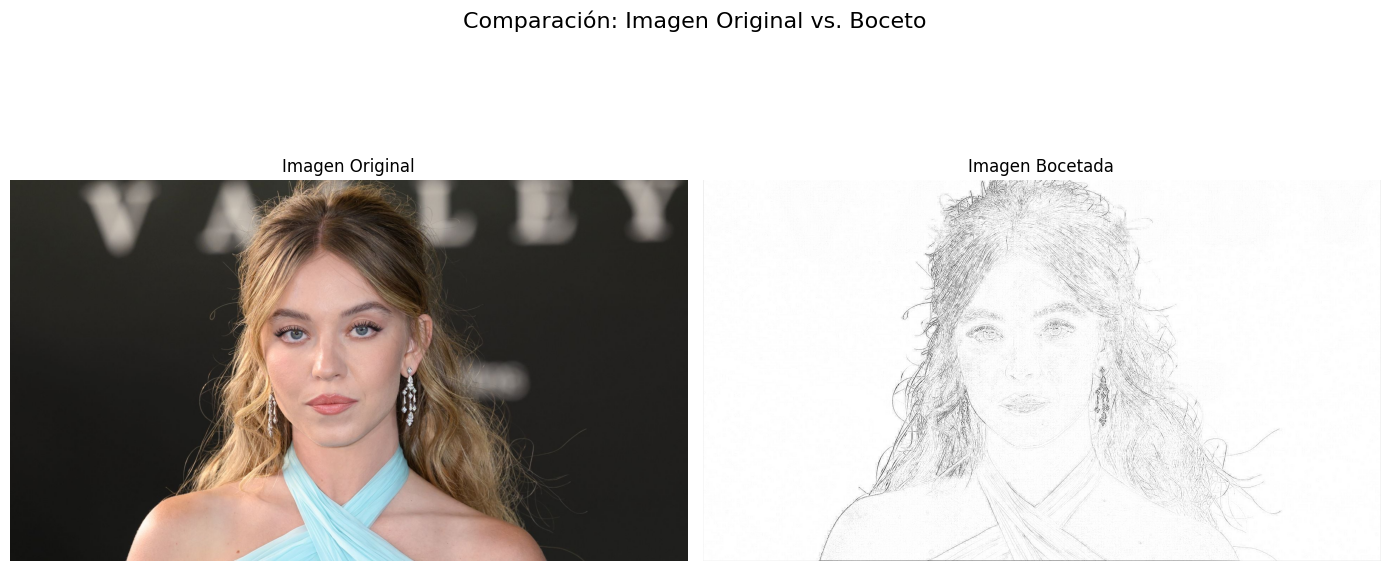

¡Listo! Imagen guardada como 'persona_boceto.png'


In [ ]:
import matplotlib.pyplot as plt
import requests
from io import BytesIO
from PIL import Image, ImageFilter, ImageOps

# --- Función para cargar imágenes desde URL ---
def load_image_from_url_simple(url):
    # Esta función descarga una imagen desde una URL.
    response = requests.get(url)
    # Abrimos la imagen directamente desde lo descargado.
    img = Image.open(BytesIO(response.content))
    return img

# --- Función para dibujar boceto de persona ---
def dibujar_boceto_persona_simple(img_pil):
    # 1. Convertir la imagen a escala de grises
    img_gray = img_pil.convert('L')

    # 2. Aplicar un filtro para encontrar los bordes (como si fuera un boceto)
    img_edges = img_gray.filter(ImageFilter.FIND_EDGES)

    # 3. Invertir los colores (para que las líneas sean oscuras y el fondo claro)
    img_boceto = ImageOps.invert(img_edges)

    # 4. Devolver la imagen con el efecto de boceto
    return img_boceto

# --- Parte principal: cargar, procesar y mostrar ---

person_image_url = "https://www.hola.com/horizon/landscape/ef333ed04068-gettyimages-2219551862.jpg"

# 1. Cargar la imagen desde la URL
img_original = load_image_from_url_simple(person_image_url)

# 2. Aplicar la función para dibujar el boceto a la imagen cargada
img_boceto = dibujar_boceto_persona_simple(img_original)

# 3. Mostrar la imagen original y la imagen bocetada una al lado de la otra
plt.figure(figsize=(14, 7))

# Subplot para la imagen original
plt.subplot(1, 2, 1) # 1 fila, 2 columnas, posición 1
plt.imshow(img_original)
plt.title('Imagen Original')
plt.axis('off')

# Subplot para la imagen bocetada
plt.subplot(1, 2, 2) # 1 fila, 2 columnas, posición 2
plt.imshow(img_boceto, cmap='gray') # Usar 'gray' porque es un boceto en blanco y negro
plt.title('Imagen Bocetada')
plt.axis('off')

plt.suptitle('Comparación: Imagen Original vs. Boceto', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 4. Guardar la imagen bocetada en un archivo
output_filename = 'persona_boceto.png'
img_boceto.save(output_filename)
print(f"¡Listo! Imagen guardada como '{output_filename}'")

##  Consolidar Funciones Simplificadas en `fotoapp.py`



In [ ]:
%%writefile fotoapp.py
from PIL import Image, ImageFilter, ImageOps
import requests
from io import BytesIO

def load_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

def redimensionar_imagen_red_social(ruta_imagen, plataforma):
    dimensiones = {
        "Youtube": (1280, 720),
        "Instagram": (1080, 1080),
        "Twitter": (1600, 900),
        "Facebook": (1200, 630)
    }

    ancho_destino, alto_destino = dimensiones[plataforma]

    if ruta_imagen.startswith(('http://', 'https://')):
        response = requests.get(ruta_imagen)
        img = Image.open(BytesIO(response.content))
    else:
        img = Image.open(ruta_imagen)

    original_ancho, original_alto = img.size

    ratio_ancho = ancho_destino / original_ancho
    ratio_alto = alto_destino / original_alto

    ratio = min(ratio_ancho, ratio_alto)

    nuevo_ancho = int(original_ancho * ratio)
    nuevo_alto = int(original_alto * ratio)

    img_redimensionada = img.resize((nuevo_ancho, nuevo_alto), Image.LANCZOS)

    imagen_final = Image.new('RGB', (ancho_destino, alto_destino), (255, 255, 255))

    posicion_x = (ancho_destino - nuevo_ancho) // 2
    posicion_y = (alto_destino - nuevo_alto) // 2

    imagen_final.paste(img_redimensionada, (posicion_x, posicion_y))

    return imagen_final

def ajustar_contraste_histograma(img_pil):
    if img_pil.mode != 'L':
        img_gray = img_pil.convert('L')
    else:
        img_gray = img_pil

    img_equalized = ImageOps.equalize(img_gray)
    return img_equalized

def aplicar_filtro_pillow(img_pil, nombre_filtro):
    filtros_disponibles = {
        'BLUR': ImageFilter.BLUR,
        'CONTOUR': ImageFilter.CONTOUR,
        'DETAIL': ImageFilter.DETAIL,
        'EDGE ENHANCE': ImageFilter.EDGE_ENHANCE,
        'EDGE ENHANCE MORE': ImageFilter.EDGE_ENHANCE_MORE,
        'EMBOSS': ImageFilter.EMBOSS,
        'FIND EDGES': ImageFilter.FIND_EDGES,
        'SHARPEN': ImageFilter.SHARPEN,
        'SMOOTH': ImageFilter.SMOOTH
    }

    filtro = filtros_disponibles[nombre_filtro]
    imagen_filtrada = img_pil.filter(filtro)
    return imagen_filtrada

def dibujar_boceto_persona(img_pil):
    img_gray = img_pil.convert('L')
    img_edges = img_gray.filter(ImageFilter.FIND_EDGES)
    img_boceto = ImageOps.invert(img_edges)
    return img_boceto


Overwriting fotoapp.py


## Menú Interactivo de Procesamiento de Imágenes (¡Ejecución Directa AQUÍ!)



Bienvenido al Editor de Fotos Simple!

--- Menú de Procesamiento de Imágenes ---
1. Cargar Imagen (desde URL)
0. Salir
Seleccione una opción: 1
Ingrese la URL de la imagen: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRv3_A4TEWAYSPni9zEVXcDyIM3sT2gzKrSYw&s
Imagen cargada exitosamente.


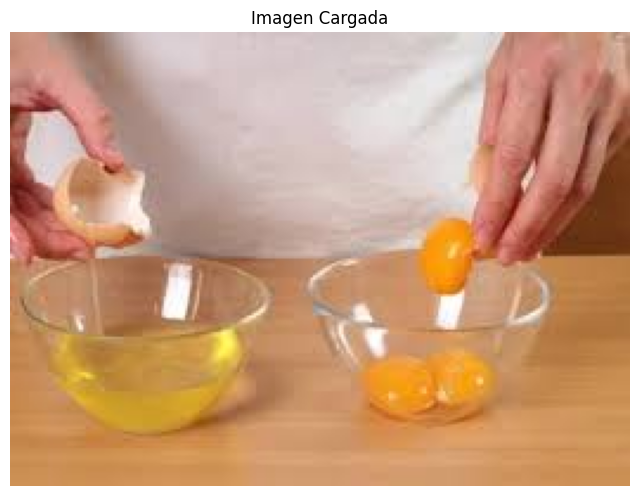


--- Menú de Procesamiento de Imágenes ---
1. Cargar Imagen (desde URL)
2. Redimensionar Imagen para Red Social
3. Ajustar Contraste
4. Aplicar Filtro
5. Dibujar Boceto
6. Guardar Imagen Actual
0. Salir
Seleccione una opción: 3
Contraste ajustado exitosamente.


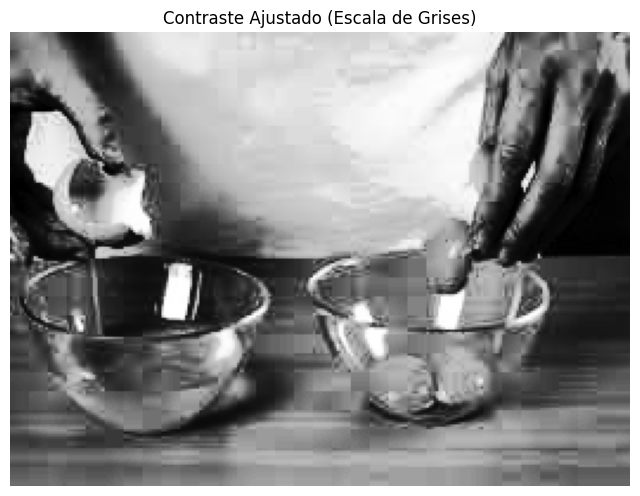


--- Menú de Procesamiento de Imágenes ---
1. Cargar Imagen (desde URL)
2. Redimensionar Imagen para Red Social
3. Ajustar Contraste
4. Aplicar Filtro
5. Dibujar Boceto
6. Guardar Imagen Actual
0. Salir
Seleccione una opción: 0
Saliendo del programa.


In [ ]:
import sys
import os
from PIL import Image
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Asegurarse de que Python pueda encontrar fotoapp.py
sys.path.insert(0, '.')

# Importar las funciones desde fotoapp.py

from fotoapp import load_image_from_url, redimensionar_imagen_red_social, ajustar_contraste_histograma, aplicar_filtro_pillow, dibujar_boceto_persona

current_image = None # La imagen actual en memoria (objeto PIL)
current_image_source = None # La URL o ruta original de la imagen, necesaria para redimensionar

def show_image(img, title='Imagen'):
    # Función auxiliar para mostrar la imagen usando matplotlib
    plt.figure(figsize=(8, 8))
    plt.imshow(img, cmap='gray' if img.mode == 'L' else None)
    plt.title(title)
    plt.axis('off')
    plt.show()

print('Bienvenido al Editor de Fotos!')

while True:
    print("\n--- Menú de Procesamiento de Imágenes ---")
    print("1. Cargar Imagen (desde URL)")
    if current_image: # Solo muestra estas opciones si hay una imagen cargada
        print("2. Redimensionar Imagen para Red Social")
        print("3. Ajustar Contraste")
        print("4. Aplicar Filtro")
        print("5. Dibujar Boceto")
        print("6. Guardar Imagen Actual")
    print("0. Salir")

    choice = input("Seleccione una opción: ")

    if choice == '1':
        url = input("Ingrese la URL de la imagen: ")

        current_image = load_image_from_url(url)
        current_image_source = url
        print("Imagen cargada exitosamente.")
        show_image(current_image, "Imagen Cargada")

    elif choice == '0':
        print("Saliendo del programa.")
        break

    elif current_image is None: # Si no hay imagen cargada, pero eligió otra opción
        print("Por favor, cargue una imagen primero (Opción 1).")

    else: # Opciones que requieren una imagen cargada
        if choice == '2':
            print("Plataformas disponibles: Youtube, Instagram, Twitter, Facebook")
            platform = input("Ingrese la plataforma de destino: ").capitalize()
            current_image = redimensionar_imagen_red_social(current_image_source, platform)
            print(f"Imagen redimensionada para {platform}.")
            show_image(current_image, f"Imagen Redimensionada para {platform}")

        elif choice == '3':
            current_image = ajustar_contraste_histograma(current_image)
            print("Contraste ajustado exitosamente.")
            show_image(current_image, "Contraste Ajustado (Escala de Grises)")

        elif choice == '4':
            filtros_disp = ['BLUR', 'CONTOUR', 'DETAIL', 'EDGE ENHANCE', 'EDGE ENHANCE MORE', 'EMBOSS', 'FIND EDGES', 'SHARPEN', 'SMOOTH']
            print(f"Filtros disponibles: {', '.join(filtros_disp)}")
            filtro_elegido = input("Ingrese el nombre del filtro a aplicar: ").upper()
            current_image = aplicar_filtro_pillow(current_image, filtro_elegido)
            print(f"Filtro '{filtro_elegido}' aplicado exitosamente.")
            show_image(current_image, f"Imagen con Filtro {filtro_elegido}")

        elif choice == '5':
            current_image = dibujar_boceto_persona(current_image)
            print("Boceto aplicado exitosamente.")
            show_image(current_image, "Imagen Bocetada")

        elif choice == '6':
            filename = input("Ingrese el nombre del archivo para guardar (ej. 'mi_imagen.png'): ")
            current_image.save(filename)
            print(f"Imagen guardada como '{filename}'.")

        else:
            print("Opción no válida. Por favor, intente de nuevo.")